# House Prices Prediction

- The goal to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable.

In [1]:
# Import necessary libraries

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

plt.style.use('ggplot')

import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge, Lasso

# Importing Regressor models

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor,BaggingRegressor, VotingRegressor

from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor

# Importing the XGBReressor from the xgboost
from xgboost import XGBRegressor

# For tuning the model

from sklearn.model_selection import GridSearchCV

# To check the model performance

from sklearn.metrics import make_scorer,mean_squared_error, r2_score, mean_absolute_error

from sklearn import tree
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# To ignore the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the dataset

data = pd.read_csv('Downloads/house-prices/train.csv')
test_data = pd.read_csv('Downloads/house-prices/test.csv')


train = data.copy()
test  = test_data.copy()

In [3]:
train.sample(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
712,713,120,RL,40.0,4671,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1988,1989,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,767,Unf,0,461,1228,GasA,Gd,Y,SBrkr,1228,0,0,1228,1,0,2,0,2,1,Gd,5,Typ,1,Gd,Attchd,1988.0,Fin,2,472,TA,TA,Y,168,120,0,0,0,0,NaN,NaN,NaN,0,10,2008,WD,Normal,189000
939,940,70,RL,NaN,24090,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,ClearCr,Norm,Norm,1Fam,2Story,7,7,1940,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,Gd,CBlock,TA,TA,Mn,Unf,0,Unf,0,1032,1032,GasA,Ex,Y,SBrkr,1207,1196,0,2403,0,0,2,0,4,1,TA,10,Typ,2,TA,Attchd,1940.0,Unf,1,349,TA,TA,Y,56,0,318,0,0,0,NaN,NaN,NaN,0,6,2010,COD,Normal,244400
806,807,80,RL,75.0,9750,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,SLvl,5,5,1967,1967,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,TA,TA,Av,ALQ,400,Rec,480,100,980,GasA,Gd,Y,SBrkr,980,0,0,980,0,0,2,0,3,1,TA,6,Typ,0,NaN,Attchd,1967.0,Fin,1,384,TA,TA,Y,68,0,0,0,0,0,NaN,NaN,NaN,0,10,2006,WD,Normal,135500
95,96,60,RL,NaN,9765,Pave,NaN,IR2,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,8,1993,1993,Gable,CompShg,VinylSd,VinylSd,BrkFace,68.0,Ex,Gd,PConc,Gd,Gd,No,ALQ,310,Unf,0,370,680,GasA,Gd,Y,SBrkr,680,790,0,1470,0,0,2,1,3,1,TA,6,Typ,1,TA,BuiltIn,1993.0,Fin,2,420,TA,TA,Y,232,63,0,0,0,0,NaN,NaN,Shed,480,4,2009,WD,Normal,185000
92,93,30,RL,80.0,13360,Pave,Grvl,IR1,HLS,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,1Story,5,7,1921,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,Gd,BrkTil,Gd,TA,No,ALQ,713,Unf,0,163,876,GasA,Ex,Y,SBrkr,964,0,0,964,1,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1921.0,Unf,2,432,TA,TA,Y,0,0,44,0,0,0,NaN,NaN,NaN,0,8,2009,WD,Normal,163500
415,416,20,RL,73.0,8899,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,7,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,24,Unf,0,1316,1340,GasA,Ex,Y,SBrkr,1340,0,0,1340,0,0,2,0,3,1,Gd,6,Typ,0,NaN,Attchd,2007.0,Fin,2,396,TA,TA,Y,100,30,0,0,0,0,NaN,NaN,NaN,0,8,2007,New,Partial,181134
867,868,20,RL,85.0,6970,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Sawyer,Feedr,Norm,1Fam,1Story,4,5,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,932,Unf,0,108,1040,GasA,TA,Y,SBrkr,1120,0,0,1120,1,0,1,1,3,1,Fa,5,Typ,0,NaN,Attchd,1961.0,RFn,2,544,TA,TA,Y,168,0,0,0,0,0,NaN,NaN,Shed,400,5,2007,WD,Normal,129000
302,303,20,RL,118.0,13704,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,150.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1541,1541,GasA,Ex,Y,SBrkr,1541,0,0,1541,0,0,2,0,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,3,843,TA,TA,Y,468,81,0,0,0,0,NaN,NaN,NaN,0,1,2006,WD,Normal,205000
594,595,20,RL,88.0,7990,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,5,6,1975,1975,Hip,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,924,924,GasA,TA,Y,SBrkr,924,0,0,924,0,0,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1981.0,Unf,1,280,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,WD,Normal,110000
1113,1114,20,RL,66.0,8923,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,643,Unf,0,365,1008,

In [4]:
# Check data types of the columns in dataset

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

**Observations:**

- There are a total of 1460 observations in each of the columns. 
- There are some missing values in some columns in the data.
- We have columns of different datatypes.

In [5]:
train.shape

(1460, 81)

In [6]:
train.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
Alley               2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          4
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        637
BsmtFinType2        6
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          753
2ndFlrSF          417
LowQualFin

In [7]:
# Dropping columns having majority missing values

train.drop(['Id', 'Alley', 'PoolQC', 'Fence', 'MiscFeature','FireplaceQu'], axis = 1, inplace = True)
test.drop(['Id', 'Alley', 'PoolQC', 'Fence', 'MiscFeature','FireplaceQu'], axis = 1, inplace = True)
train.shape

(1460, 75)

In [8]:
# missing values by columns.

train.isna().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath     

In [9]:
# Checking Statistical summary of data

train.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


**Observations:**

- SalePrice of houses sold has a mininmun of 34,900 and maximum of 755,000 and an average selling price of 180,921
- The oldest house in the dataset was built in year 1872 and newest house built in 2010

### Missing value treatment

In [10]:
# Removing the few rows with missing values from the columns

train1 = train[train['GarageType'].notnull()]
train1 = train1[train1['BsmtExposure'].notnull()]
train1 = train1[train1['BsmtFinType2'].notnull()]
train1 = train1[train1['MasVnrType'].notnull()]
train1.shape

(1339, 75)

In [11]:
# Rate of missing values by columns.

train1.isna().sum() / train.shape[0] * 100

MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      16.712329
LotArea           0.000000
Street            0.000000
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.000000
MasVnrArea        0.000000
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          0.000000
BsmtCond          0.000000
BsmtExposure      0.000000
BsmtFinType1      0.000000
BsmtFinSF1        0.000000
BsmtFinType2      0.000000
BsmtFinSF2        0.000000
BsmtUnfSF         0.000000
TotalBsmtSF       0.000000
H

In [12]:
# Checking the columns that have missing data and displaying only those

train1.isnull().sum()[train1.isnull().sum() != 0]

LotFrontage    244
Electrical       1
dtype: int64

In [13]:
# Checking for categories in the variable

train1['Electrical'].value_counts(1)

SBrkr    0.928251
FuseA    0.056801
FuseF    0.012706
FuseP    0.001495
Mix      0.000747
Name: Electrical, dtype: float64

In [14]:
# Checking for mode of categorical variable

train1['Electrical'].mode()

0    SBrkr
Name: Electrical, dtype: object

In [15]:
# Filling missing values with mode of categorical variable

train1['Electrical'] = train1['Electrical'].fillna('SBrkr')

In [16]:
# Finding median of categorical variable

train1['LotFrontage'].median()

70.0

In [17]:
# Filling missing values with median

train1['LotFrontage'] = train1['LotFrontage'].fillna(train1['LotFrontage'].median())

In [18]:
# Checking the columns that have missing data and displaying only those

train1.isnull().sum()[train1.isnull().sum() != 0]

Series([], dtype: int64)

In [19]:
# Checking for duplicated rows

train1.duplicated().sum()

0

In [20]:
# Making a list of all catrgorical variables
cat_col = list(train1.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(train1[column].value_counts())
    print("-" * 50)

RL         1067
RM          191
FV           62
RH           11
C (all)       8
Name: MSZoning, dtype: int64
--------------------------------------------------
Pave    1334
Grvl       5
Name: Street, dtype: int64
--------------------------------------------------
Reg    830
IR1    459
IR2     40
IR3     10
Name: LotShape, dtype: int64
--------------------------------------------------
Lvl    1207
Bnk      52
HLS      48
Low      32
Name: LandContour, dtype: int64
--------------------------------------------------
AllPub    1338
NoSeWa       1
Name: Utilities, dtype: int64
--------------------------------------------------
Inside     958
Corner     244
CulDSac     90
FR2         43
FR3          4
Name: LotConfig, dtype: int64
--------------------------------------------------
Gtl    1266
Mod      61
Sev      12
Name: LandSlope, dtype: int64
--------------------------------------------------
NAmes      209
CollgCr    146
OldTown    100
Somerst     83
Gilbert     77
NridgHt     75
NWAmes 

**Observation:**
    
- There are 43 columns with categories describing different aspect of the building.

### **Univariate Analysis**

In [21]:
#Determine the correlation btw variables and amount of variation in 1 variable can be explained in 2nd variable 

C1C2 = pd.DataFrame(train1.loc[train1['Condition1'] != train1['Condition2'], 'Condition1'])
C1C2.shape[0] / train1.shape[0] * 100

12.845407020164302

In [22]:
#Determine the correlation btw variables and amount of variation in 1 variable can be explained in 2nd variable 

GQGC = pd.DataFrame(train1.loc[train1['GarageQual'] != train1['GarageCond'], 'GarageQual'])
GQGC.shape[0] / train1.shape[0] * 100

4.256908140403286

In [23]:
# Dropping insignificant variables

train1.drop(['Condition2','Exterior2nd','GarageCond'], axis = 1, inplace = True)
test.drop(['Condition2','Exterior2nd','GarageCond'], axis = 1, inplace = True)

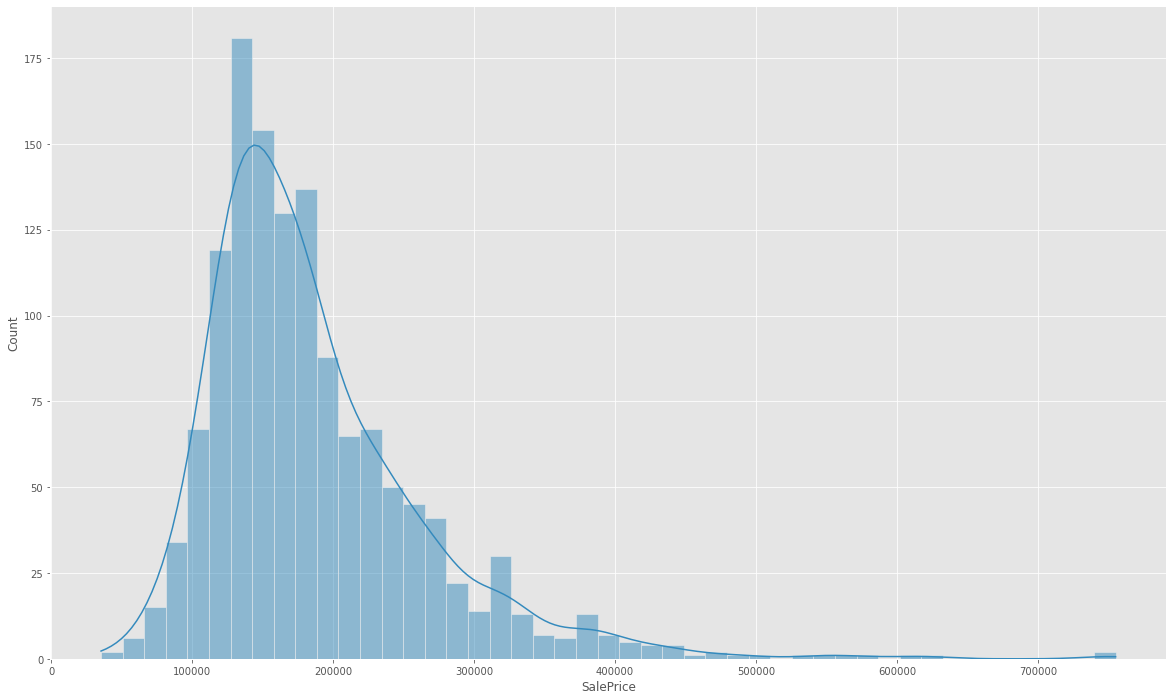

In [24]:
# Histogram plot of target variable "Salesprice"

plt.figure(figsize = (20, 12))
    
sns.histplot(data = train1, x = 'SalePrice', kde = True)
    
plt.show()

**Observation:**

- The target variable 'Salesprice' is right skewed 

In [25]:
# Applying a log transformation on the 'SalePrice' column

train1['SalePrice_log'] = np.log(train1['SalePrice'])

<AxesSubplot:xlabel='SalePrice_log', ylabel='Count'>

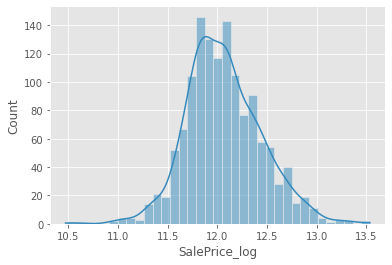

In [26]:
sns.histplot(data = train1, x = 'SalePrice_log', kde = True)

**Observation:**

- The log-transformed variable **'SalePrice_log'** appears to have a nearly normal distribution without skew

### **Bivariate Analysis**

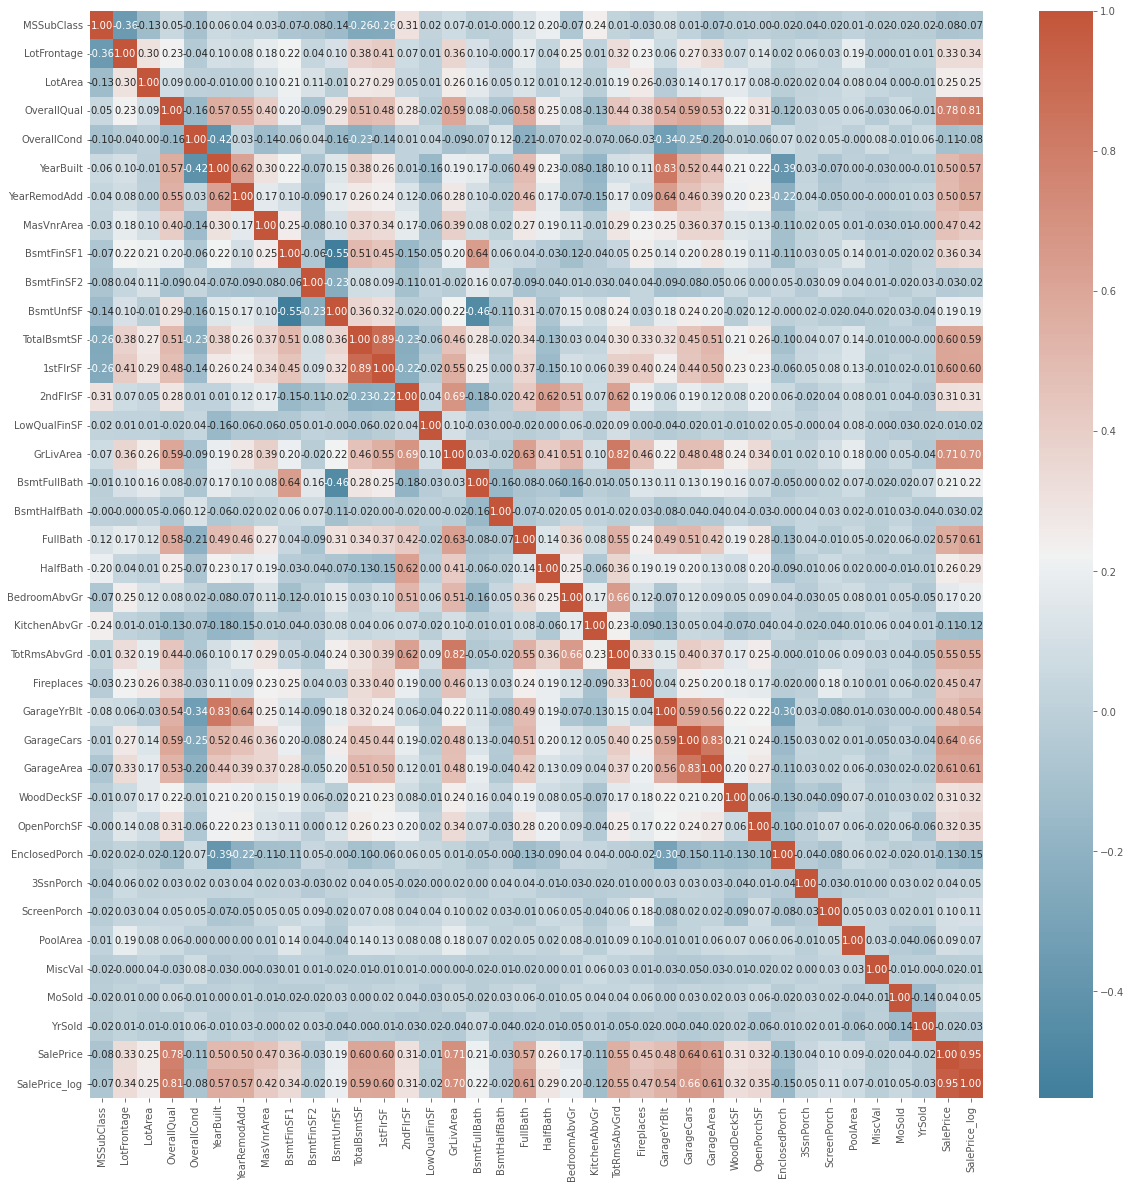

In [27]:
# Finding the correlation between various columns of the dataset

plt.figure(figsize = (20, 20))

cmap = sns.diverging_palette(230, 20, as_cmap = True)

sns.heatmap(train1.corr(), annot = True, fmt = '.2f', cmap = cmap )

plt.show()

#sns.heatmap(train1.corr(), annot = True);

#plt.xticks(rotation = 45);

**Observation:**

- There's a srong positive correlation between the 'OverallQual', 'TotalBsmtSf', 'GrLivArea', 'GarageCars' and the target variable 'SalesPrice'.
- There's a weak positive correlation between 'YearBuilt', 'FullBath', 'TotRmsAbovGr' and target variable 'SalesPrice'.


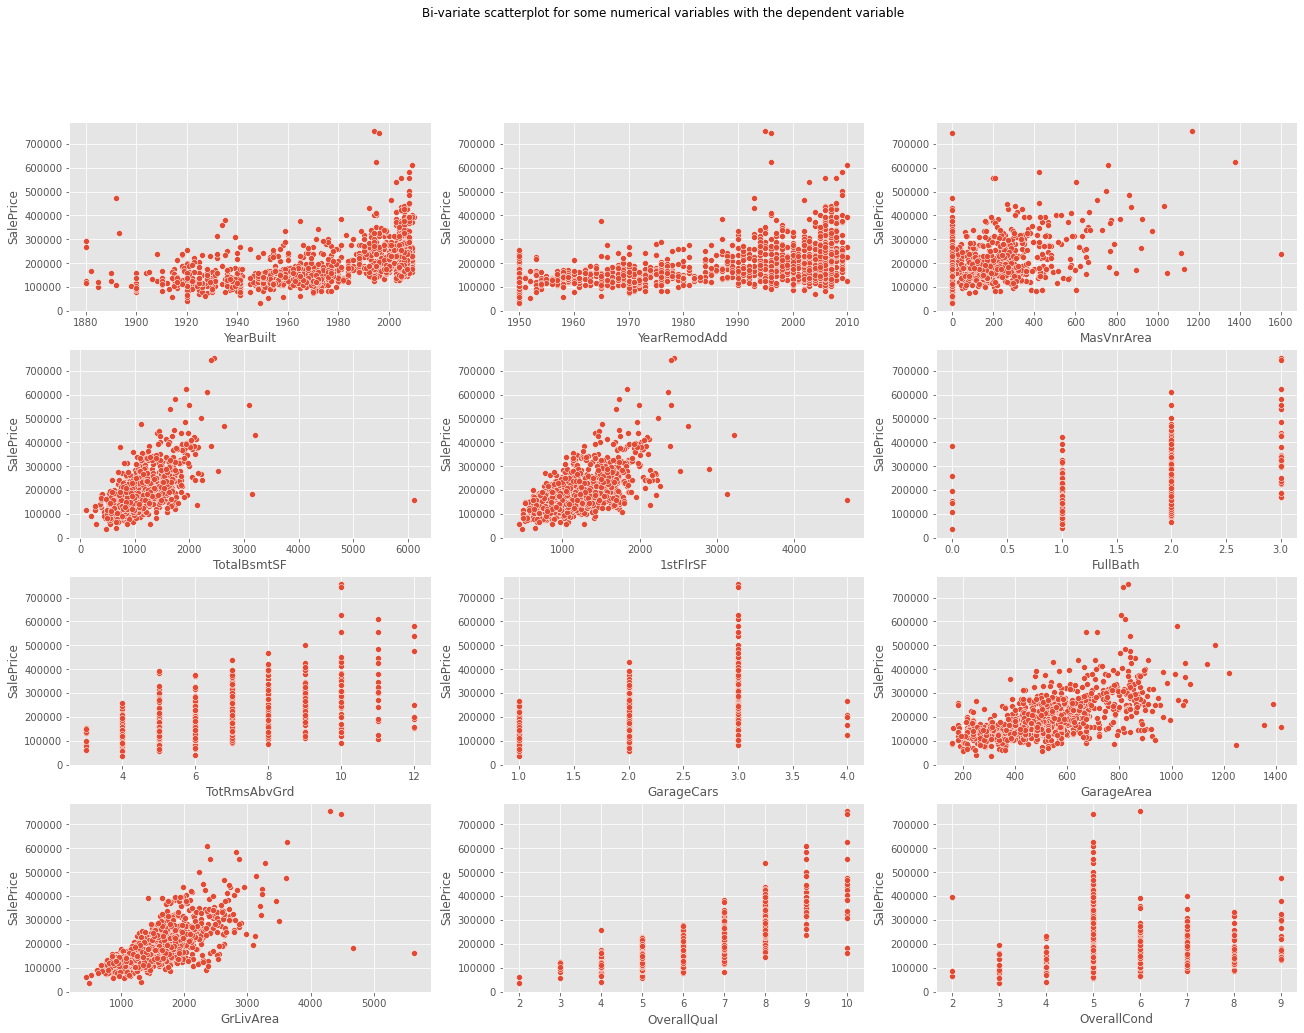

In [28]:
# Scatterplot for some numerical variables with the dependent variable

fig, axes = plt.subplots(4, 3, figsize = (22, 16))
  
fig.suptitle('Bi-variate scatterplot for some numerical variables with the dependent variable')
  
sns.scatterplot(x = 'YearBuilt', y = 'SalePrice', data = train1, ax = axes[0,0]);

sns.scatterplot(x = 'YearRemodAdd', y = 'SalePrice', data = train1, ax = axes[0,1]);

sns.scatterplot(x = 'MasVnrArea', y = 'SalePrice', data = train1, ax = axes[0,2]);

sns.scatterplot(x = 'TotalBsmtSF', y = 'SalePrice', data = train1, ax = axes[1,0]);

sns.scatterplot(x = '1stFlrSF', y = 'SalePrice', data = train1, ax = axes[1,1]);

sns.scatterplot(x = 'FullBath', y = 'SalePrice', data = train1, ax = axes[1,2]);

sns.scatterplot(x = 'TotRmsAbvGrd', y = 'SalePrice', data = train1, ax = axes[2,0]);

sns.scatterplot(x = 'GarageCars', y = 'SalePrice', data = train1, ax = axes[2,1]);

sns.scatterplot(x = 'GarageArea', y = 'SalePrice', data = train1, ax = axes[2,2]);

sns.scatterplot(x = 'GrLivArea', y = 'SalePrice', data = train1, ax = axes[3,0]);

sns.scatterplot(x = 'OverallQual', y = 'SalePrice', data = train1, ax = axes[3,1]);

sns.scatterplot(x = 'OverallCond', y = 'SalePrice', data = train1, ax = axes[3,2]);

**Observation:**

- From the scatter plot, there is a clear positive correlation between 'OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrlivArea' and the target variable 'SalesPrice'.
- There is a weak positive correlation between 'YearBuilt', TotRmsAbvGrd', 'GarageCars' and target variable 'SalesPrice'. 
- There seems to be no correlation 'MasVnrArea' and target variable 'SalePrice'.

**Let's check the distribution of our target variable i.e 'SalesPrice' with the other categorical columns**

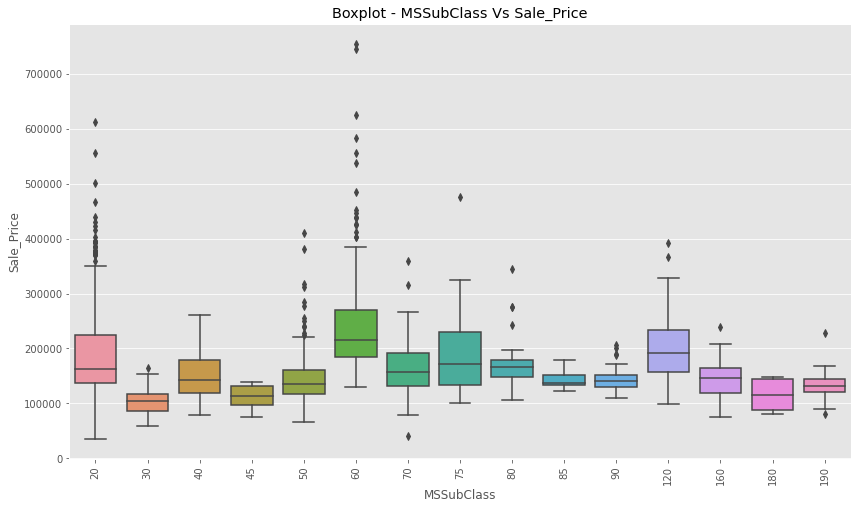

In [29]:
# Boxplot to check relationship between categorical variable and target variable "SalesPrice".

plt.figure(figsize = [14, 8])
sns.boxplot(train1.MSSubClass, train1.SalePrice)
plt.xticks(rotation = 90)
plt.title("Boxplot - MSSubClass Vs Sale_Price")
plt.xlabel("MSSubClass")
plt.ylabel("Sale_Price")
plt.show()

**Observations:**

- Houses in the "MSSubClass" 60 have the highest "SalesPrice" followed by "MSSubClass" 120 and 70. 
- "MSSubClass" 30 and 45 have the lowest 'SalesPrice"
- There seems to be no particular order between the ordering of the class and the 'SalesPrice'.

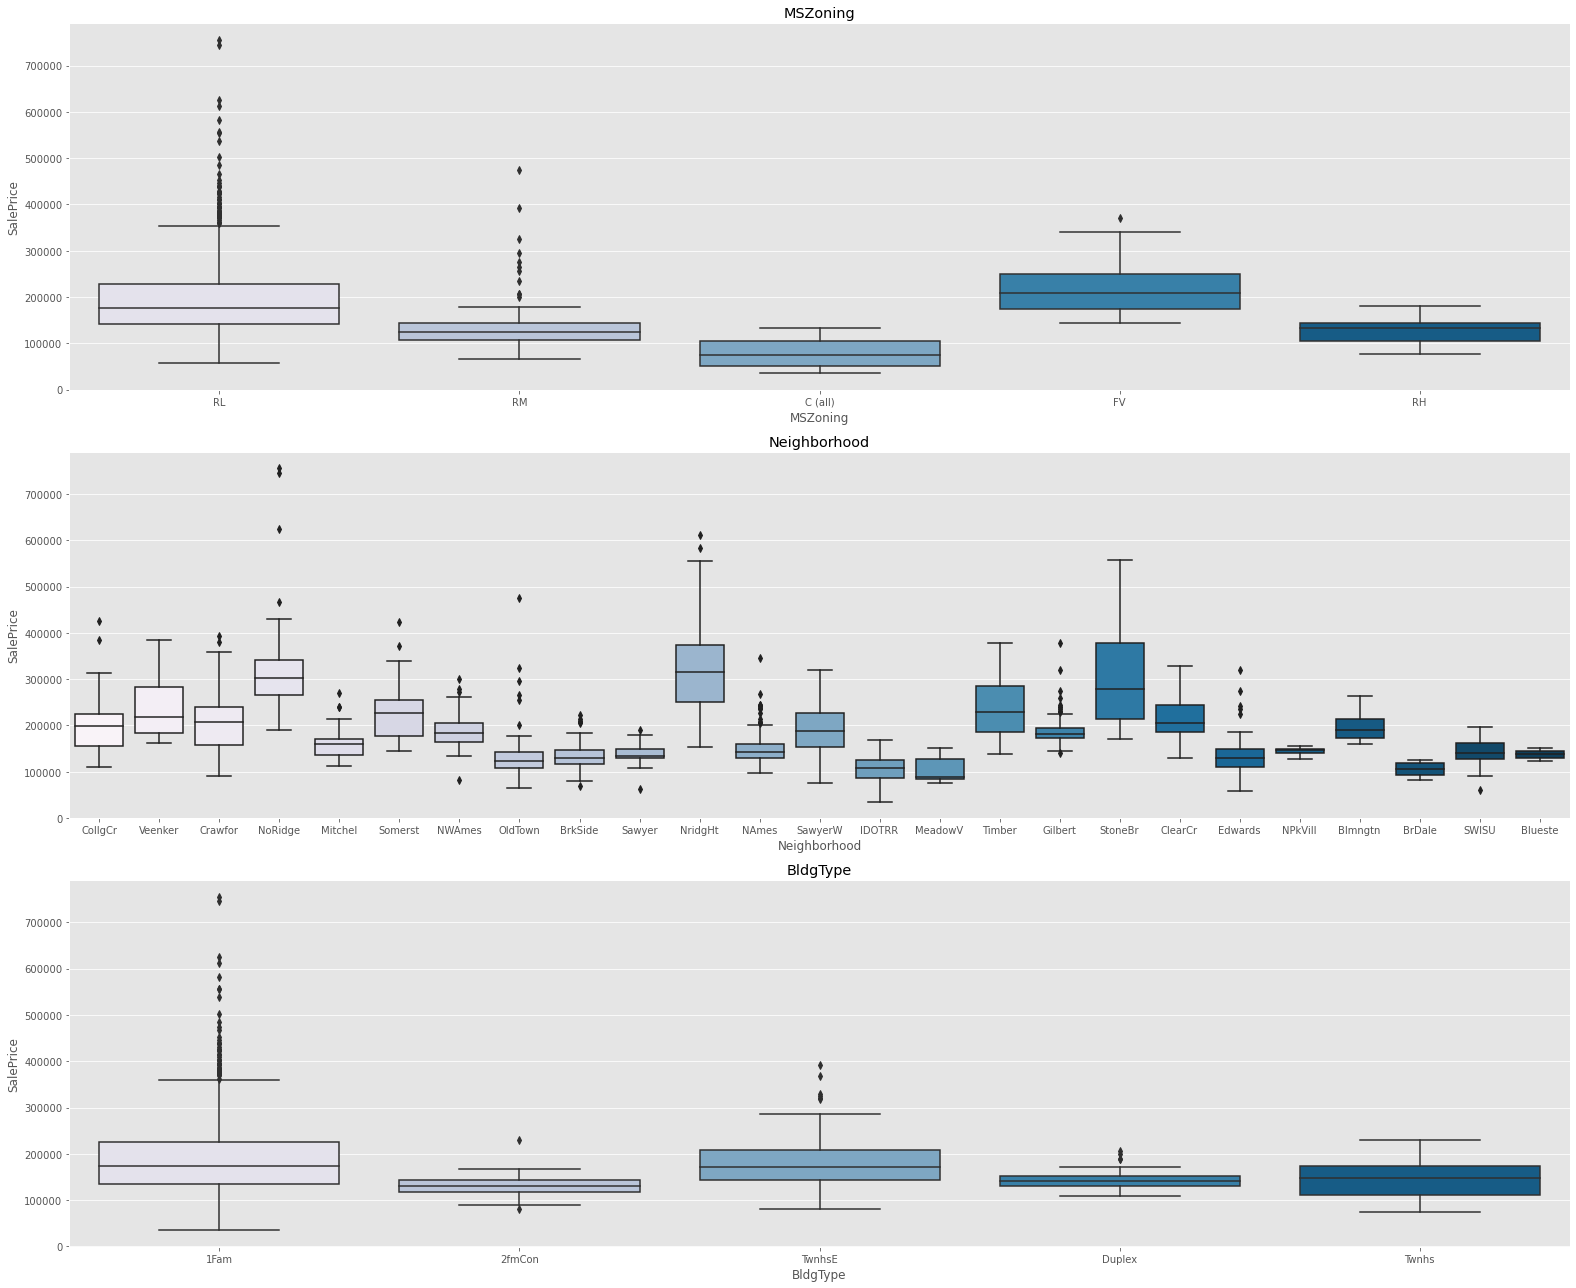

In [30]:
# Boxplot to check relationship between categorical variable and target variable "SalesPrice".

cols = train1[['MSZoning','Neighborhood','BldgType']].columns.tolist()
plt.figure(figsize=(22,18))

for i, variable in enumerate(cols):
                     plt.subplot(3,1,i+1)
                     sns.boxplot(train1[variable],train1['SalePrice'],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

**Observation:**

- Houses in different neighbourhoods clearly have different median "SalesPrice" which shows the neighbourhood is a significant determinant of House prices.
- The median 'SalesPrice' for houses of different building type does not vary much, this will be a less significant determinant of the target variable 'SalesPrice'. 

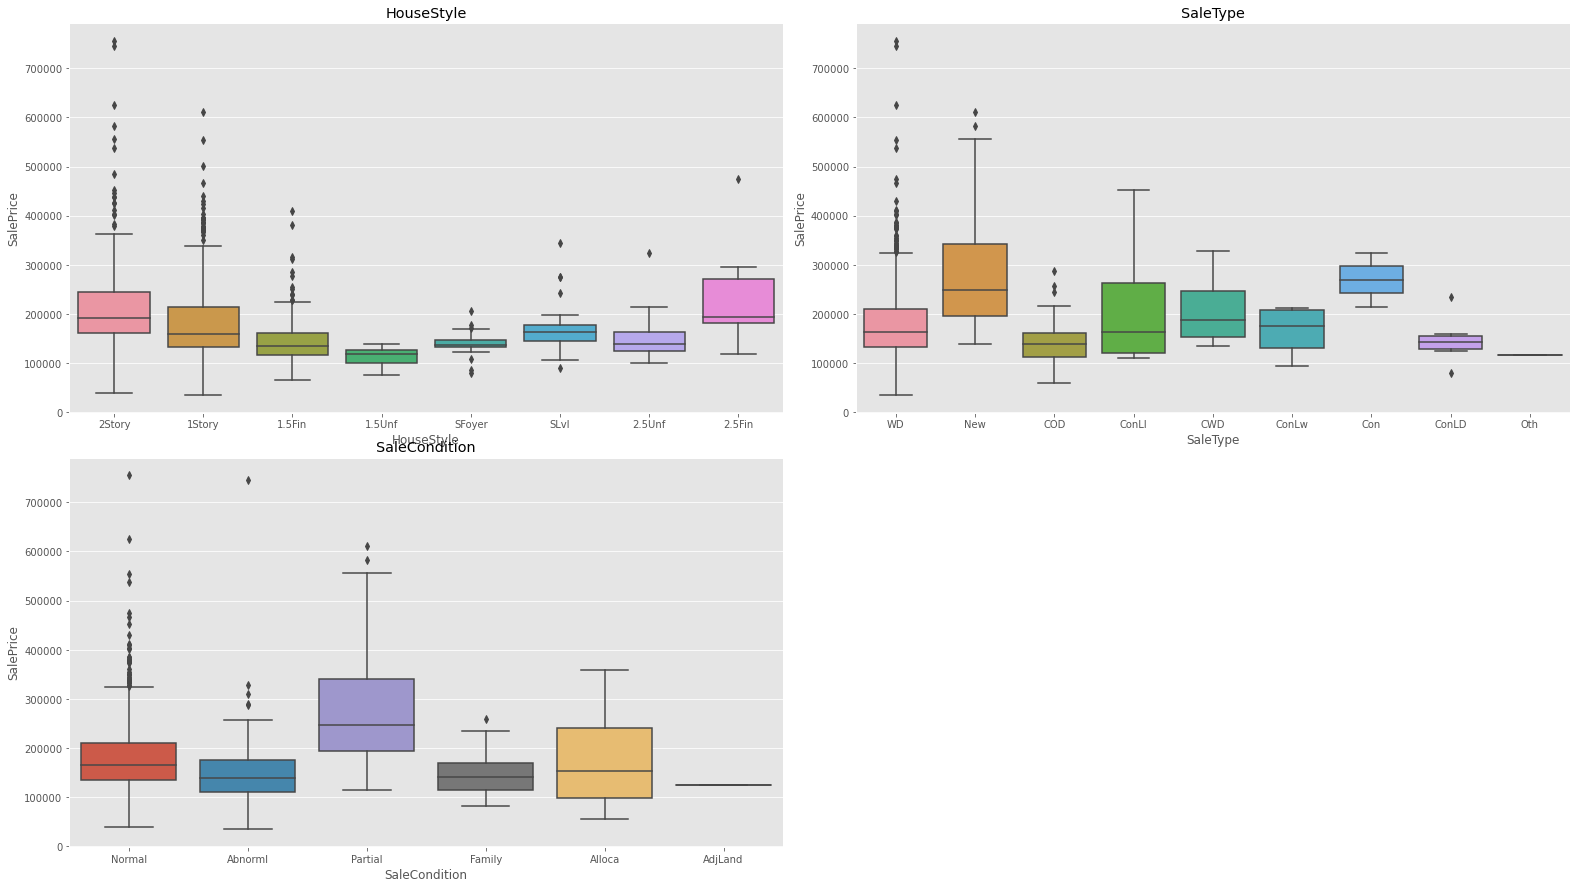

In [31]:
# Boxplot to check relationship between categorical variable and target variable "SalesPrice".

cols1 = train1[['HouseStyle','SaleType','SaleCondition']].columns.tolist()
plt.figure(figsize=(22,18))

for i, variable in enumerate(cols1):
                     plt.subplot(3,2,i+1)
                     sns.boxplot(train1[variable],train1['SalePrice'])
                     plt.tight_layout()
                     plt.title(variable)
plt.show()


**Observation:**

- From the boxplot above we can see strong variations in the median 'SalesPrice' value for different categories in the 'SaleCondition' and 'SaleType' columns, which suggest this column are significant effect on the target variable "SalesPrice".

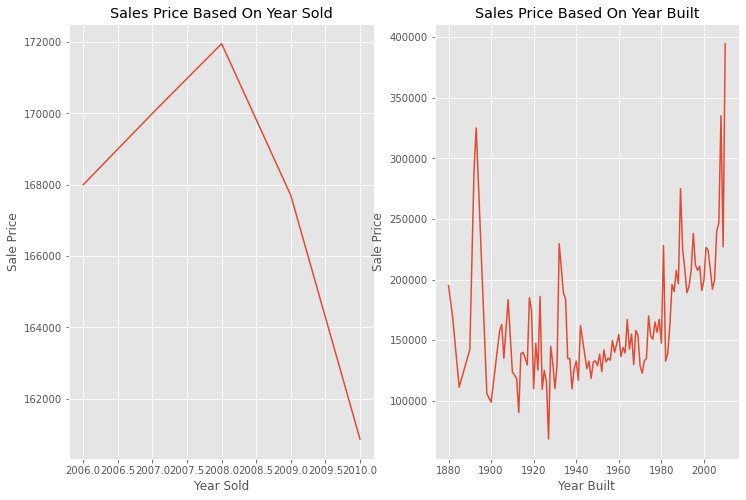

In [32]:
# Line Plot of target variable "SalesPrice" vs "YearSold" and "Year Built"

xdmd= train1.groupby('YrSold')['SalePrice'].median()
xdmdb= train1.groupby('YearBuilt')['SalePrice'].median()
fig, axes = plt.subplots(1, 2, figsize=(12, 8))
axes[0].plot(xdmd.index, xdmd)
axes[0].set_title('Sales Price Based On Year Sold')
axes[0].set_xlabel('Year Sold')
axes[0].set_ylabel('Sale Price')
axes[1].plot(xdmdb.index,xdmdb)
axes[1].set_title('Sales Price Based On Year Built')
axes[1].set_xlabel('Year Built')
axes[1].set_ylabel('Sale Price');

**Observation:**

- From the lineplot of 'SalePrice' vs 'YearSold', we can deduce that House prices where highest in the year 2008, suggesting a boom in the housing market.
- From the lineplot of 'SalePrice' vs 'YearBuilt', the relationship between the "SalesPrice" and "YearBuilt" fluctuates heavily but there is an underlying trend showing that newer houses have a higher "SalesPrice". 

**Data Preprocessing**

Feature Engineering

In [33]:
# Evaluating Builing Age
train1['Bldg-Age'] = train1['YrSold'] - train1['YearBuilt']
test['Bldg-Age'] = train1['YrSold'] - train1['YearBuilt']

# Evaluating time period since when building was Remodelled
train1['Remodel-Age'] = train1['YrSold'] - train1['YearRemodAdd']
test['Remodel-Age'] = train1['YrSold'] - train1['YearRemodAdd']

train1.drop(['MoSold', 'YrSold','YearBuilt', 'YearRemodAdd'], axis = 1, inplace = True)
test.drop(['MoSold', 'YrSold','YearBuilt', 'YearRemodAdd'], axis = 1, inplace = True)

In [34]:
train1.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice,SalePrice_log,Bldg-Age,Remodel-Age
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,Y,0,61,0,0,0,0,0,WD,Normal,208500,12.247694,5,5
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,1Fam,1Story,6,8,Gable,CompShg,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,Y,298,0,0,0,0,0,0,WD,Normal,181500,12.109011,31,31
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,Y,0,42,0,0,0,0,0,WD,Normal,223500,12.317167,7,6
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,Y,0,35,272,0,0,0,0,WD,Abnorml,140000,11.849398,91,36
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,Y,192,84,0,0,0,0,0,WD,Normal,250000,12.429216,8,8


In [35]:
# Separating features and the target column

X_df = train1.drop(['SalePrice', 'SalePrice_log'], axis = 1)
Y_df = train1['SalePrice']
Y_log_df = train1['SalePrice_log']

X_df.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,Bldg-Age,Remodel-Age
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,Y,0,61,0,0,0,0,0,WD,Normal,5,5
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,1Fam,1Story,6,8,Gable,CompShg,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,Y,298,0,0,0,0,0,0,WD,Normal,31,31
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,Y,0,42,0,0,0,0,0,WD,Normal,7,6
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,Y,0,35,272,0,0,0,0,WD,Abnorml,91,36
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,Y,192,84,0,0,0,0,0,WD,Normal,8,8


In [36]:
# Creating a list of columns for which we will create dummy variables

dummies_features = ['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 
                    'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 
                    'Exterior1st', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation','BsmtQual', 'BsmtCond',
                    'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 
                    'Electrical','KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 
                    'PavedDrive', 'SaleType', 'SaleCondition']

# Creating dummy variables
X_df = pd.get_dummies(data = X_df, columns = dummies_features, drop_first = True)
test = pd.get_dummies(data = test, columns = dummies_features, drop_first = True)


### **Data Preparation for Modelling**

In [37]:
# Splitting the data into train and test sets in 70:30 ratio

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_df, Y_log_df, test_size = 0.30, random_state = 1)

In [38]:
# Creating an instance of the MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Applying fit_transform on the training features data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# The above scaler returns the data in array format, below we are converting it back to pandas DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, index = X_train.index, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, index = X_test.index, columns = X_test.columns)

X_train_scaled.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,Bldg-Age,Remodel-Age,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasW,Heating_Grav,Heating_OthW,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
811,0.167808,0.014667,0.500,0.428571,0.122642,0.117293,0.000000,0.079623,0.111149,0.096380,0.000000,0.0,0.078786,0.5,0.0,0.333333,0.0,0.166667,0.0,0.111111,0.333333,0.945455,0.333333,0.206677,0.163361,0.000000,0.000000,0.0,0.0,0.0,0.0,0.031008,0.066667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0

In [39]:
# Importing libraries for building linear regression model
import statsmodels.api as sm

# Add the intercept term
X_train_scaled = sm.add_constant(X_train_scaled)
X_test_scaled = sm.add_constant(X_test_scaled)

In [40]:
# Creating function to evaluate model performance

from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_absolute_error, mean_squared_error

# Model Performance on test and train data
def model_pref(olsmodel, x_train, x_test):

    # Insample Prediction
    y_pred_train = olsmodel.predict(x_train)
    y_observed_train = y_train

    # Prediction on test data
    y_pred_test = olsmodel.predict(x_test)
    y_observed_test = y_test

    print(
        pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "RMSE": [
                    np.sqrt(mean_squared_error(y_pred_train, y_observed_train)),
                    np.sqrt(mean_squared_error(y_pred_test, y_observed_test)),
                ],
                "MAE": [
                    mean_absolute_error(y_pred_train, y_observed_train),
                    mean_absolute_error(y_pred_test, y_observed_test),
                ],
                
                "r2": [
                    r2_score(y_pred_train, y_observed_train),
                    r2_score(y_pred_test, y_observed_test),
                ],
            }
        )
    )

In [41]:
# Function to compute the adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    
    r2 = r2_score(targets, predictions)
    
    n = predictors.shape[0]
    
    k = predictors.shape[1]
    
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# Function to compute MAPE

def mape_score(targets, predictions):
    
    return np.mean(np.abs(targets - predictions) / targets) * 100


# Function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    
    predictors: independent variables
    
    target: dependent variable
    """

    # Predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)                      # To compute R-squared
    
    adjr2 = adj_r2_score(predictors, target, pred)   # To compute adjusted R-squared
    
    rmse = np.sqrt(mean_squared_error(target, pred)) # To compute RMSE
    
    mae = mean_absolute_error(target, pred)          # To compute MAE
    
    mape = mape_score(target, pred)                  # To compute MAPE

    # Creating a dataframe of metrics
    
    df_perf = pd.DataFrame(
        {
            "RMSE":  rmse,
            "MAE":  mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        
        index = [0],
    )

    return df_perf

## **Building Models**

**- Linear Model** 

In [42]:
# Calling the OLS algorithm on the train features and the target variable
model1 = sm.OLS(y_train, X_train_scaled)

# Fitting the Model
model1 = model1.fit()

print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:          SalePrice_log   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     82.15
Date:                Wed, 22 Feb 2023   Prob (F-statistic):               0.00
Time:                        00:35:10   Log-Likelihood:                 1050.8
No. Observations:                 937   AIC:                            -1704.
Df Residuals:                     738   BIC:                            -739.9
Df Model:                         198                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     7.57

**Observations:**

- We can see that the R-squared for the model is 0.957.
- Not all the variables are statistically significant to predict the outcome variable. Variables with p-value greater 0.05 are statistically significant to predict the outcome variable. Variables with p-value less than 0.05 will be dropped.

In [43]:
model_pref(model1, X_train_scaled, X_test_scaled)

    Data      RMSE       MAE        r2
0  Train  0.078836  0.056643  0.954627
1   Test  0.357421  0.284727  0.491541


**Observation:**

- There is a huge difference between R-squared of our training and test data. This suggest huge overfitting of our model. 
- We are going to check for multicolinearity between the variables to eliminate the problem of overfitting.

### **Checking for Multicolinearity**

In [44]:
# Using the Variance Inflation Factor (VIF), to check if there is multicollinearity in the data.

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series = pd.Series(
    [variance_inflation_factor(X_train_scaled.values, i) for i in range(X_train_scaled.shape[1])],
    index = X_train_scaled.columns,
    dtype = float)

print("VIF Scores: \n\n{}\n".format(vif_series))

VIF Scores: 

const                      0.000000
LotFrontage                2.871430
LotArea                    4.429815
OverallQual                5.729076
OverallCond                3.023425
MasVnrArea                 3.422062
BsmtFinSF1                      inf
BsmtFinSF2                      inf
BsmtUnfSF                       inf
TotalBsmtSF                     inf
1stFlrSF                        inf
2ndFlrSF                        inf
LowQualFinSF                    inf
GrLivArea                       inf
BsmtFullBath               3.104576
BsmtHalfBath               1.580703
FullBath                   5.043948
HalfBath                   3.466178
BedroomAbvGr               3.848908
KitchenAbvGr               6.190380
TotRmsAbvGrd               6.788946
Fireplaces                 2.357845
GarageYrBlt                7.760436
GarageCars                 5.849782
GarageArea                 5.674063
WoodDeckSF                 1.626642
OpenPorchSF                1.812858
EnclosedPorch 

**Observation:**

- The VIF score for 'BsmtFinSF2' is very high, we will start by dropping this column, remodel and then check the VIF score again.
- Features having a VIF score > 5 will be dropped until all the features have a VIF score < 5.

In [45]:
# Features having a VIF score > 5 will be dropped until all the features have a VIF score < 5

X_train_scaled.drop('BsmtFinSF2', axis =1 , inplace = True)
X_test_scaled.drop('BsmtFinSF2', axis =1 , inplace = True)

test.drop('BsmtFinSF2', axis =1 , inplace = True)

In [46]:
vif_series = pd.Series(
    [variance_inflation_factor(X_train_scaled.values, i) for i in range(X_train_scaled.shape[1])],
    index = X_train_scaled.columns,
    dtype = float)

print("VIF Scores: \n\n{}\n".format(vif_series))

VIF Scores: 

const                    7507.869684
LotFrontage                 2.871430
LotArea                     4.429815
OverallQual                 5.729076
OverallCond                 3.023425
MasVnrArea                  3.422062
BsmtFinSF1                 38.580784
BsmtUnfSF                  36.091314
TotalBsmtSF                40.297485
1stFlrSF                         inf
2ndFlrSF                         inf
LowQualFinSF                     inf
GrLivArea                        inf
BsmtFullBath                3.104576
BsmtHalfBath                1.580703
FullBath                    5.043948
HalfBath                    3.466178
BedroomAbvGr                3.848908
KitchenAbvGr                6.190380
TotRmsAbvGrd                6.788946
Fireplaces                  2.357845
GarageYrBlt                 7.760436
GarageCars                  5.849782
GarageArea                  5.674063
WoodDeckSF                  1.626642
OpenPorchSF                 1.812858
EnclosedPorch           

In [47]:
model2 = sm.OLS(y_train, X_train_scaled)

model2 = model2.fit()

In [48]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:          SalePrice_log   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     82.15
Date:                Wed, 22 Feb 2023   Prob (F-statistic):               0.00
Time:                        00:35:20   Log-Likelihood:                 1050.8
No. Observations:                 937   AIC:                            -1704.
Df Residuals:                     738   BIC:                            -739.9
Df Model:                         198                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     7.59

In [49]:
# Features having a VIF score > 5 will be dropped until all the features have a VIF score < 5

X_train_scaled1 = X_train_scaled.drop(['BsmtFinSF1', 'BsmtUnfSF','LowQualFinSF','BsmtFullBath','Fireplaces','GarageYrBlt','GarageArea','EnclosedPorch', 'MiscVal', 'MSSubClass_40','MSSubClass_160', 'LotShape_IR3','LotShape_Reg', 'LandContour_Lvl','Neighborhood_BrkSide', 'Neighborhood_Crawfor', 'Neighborhood_NridgHt','Condition1_Feedr', 'Condition1_RRNn', 'HouseStyle_2.5Fin', 'RoofStyle_Gable','RoofStyle_Mansard', 'Exterior1st_CemntBd','Exterior1st_MetalSd', 'Exterior1st_WdShing', 'ExterQual_Fa', 'Foundation_Stone', 'BsmtQual_Fa','BsmtCond_TA', 'BsmtExposure_Mn', 'BsmtFinType1_BLQ', 'HeatingQC_Po', 'Electrical_SBrkr', 'GarageType_CarPort', 'PavedDrive_P', 'SaleType_ConLw', 'SaleCondition_Family'], axis = 1)
X_test_scaled1 = X_test_scaled.drop(['BsmtFinSF1', 'BsmtUnfSF','LowQualFinSF','BsmtFullBath','Fireplaces','GarageYrBlt','GarageArea','EnclosedPorch', 'MiscVal', 'MSSubClass_40','MSSubClass_160', 'LotShape_IR3','LotShape_Reg', 'LandContour_Lvl','Neighborhood_BrkSide', 'Neighborhood_Crawfor', 'Neighborhood_NridgHt','Condition1_Feedr', 'Condition1_RRNn', 'HouseStyle_2.5Fin', 'RoofStyle_Gable','RoofStyle_Mansard', 'Exterior1st_CemntBd','Exterior1st_MetalSd', 'Exterior1st_WdShing', 'ExterQual_Fa', 'Foundation_Stone', 'BsmtQual_Fa','BsmtCond_TA', 'BsmtExposure_Mn', 'BsmtFinType1_BLQ', 'HeatingQC_Po', 'Electrical_SBrkr', 'GarageType_CarPort', 'PavedDrive_P', 'SaleType_ConLw', 'SaleCondition_Family'], axis = 1)

In [50]:
vif_series = pd.Series(
    [variance_inflation_factor(X_train_scaled1.values, i) for i in range(X_train_scaled1.shape[1])],
    index = X_train_scaled1.columns,
    dtype = float)

print("VIF Scores: \n\n{}\n".format(vif_series))

VIF Scores: 

const                    5064.587486
LotFrontage                 2.645563
LotArea                     3.714844
OverallQual                 5.228538
OverallCond                 2.605449
MasVnrArea                  3.163984
TotalBsmtSF                12.144689
1stFlrSF                  166.342318
2ndFlrSF                  187.149544
GrLivArea                 277.532182
BsmtHalfBath                1.326332
FullBath                    4.560496
HalfBath                    3.277279
BedroomAbvGr                3.421509
KitchenAbvGr                5.253528
TotRmsAbvGrd                6.281609
GarageCars                  2.793879
WoodDeckSF                  1.537032
OpenPorchSF                 1.680877
3SsnPorch                   1.250434
ScreenPorch                 1.329151
PoolArea                    1.723269
Bldg-Age                   17.648987
Remodel-Age                 4.037865
MSSubClass_30               2.506496
MSSubClass_45              11.368420
MSSubClass_50           

In [51]:
model3 = sm.OLS(y_train, X_train_scaled1)

model3 = model3.fit()

print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:          SalePrice_log   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     93.46
Date:                Wed, 22 Feb 2023   Prob (F-statistic):               0.00
Time:                        00:35:23   Log-Likelihood:                 1000.8
No. Observations:                 937   AIC:                            -1674.
Df Residuals:                     773   BIC:                            -879.4
Df Model:                         163                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     7.98

In [52]:
# Features having a VIF score > 5 will be dropped until all the features have a VIF score < 5

X_train_scaled2 = X_train_scaled1.drop(['1stFlrSF','BsmtHalfBath', 'FullBath', 'TotRmsAbvGrd', '3SsnPorch', 'MSSubClass_75', 'MSSubClass_190','LandContour_HLS', 'Utilities_NoSeWa', 'LotConfig_FR3', 'LotConfig_Inside','LandSlope_Mod', 'Neighborhood_Blueste','Neighborhood_BrDale', 'Neighborhood_MeadowV', 'Neighborhood_NPkVill','Neighborhood_Veenker',
'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe', 'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE', 'HouseStyle_1.5Unf'], axis = 1)

X_test_scaled2 = X_test_scaled1.drop(['1stFlrSF','BsmtHalfBath', 'FullBath', 'TotRmsAbvGrd', '3SsnPorch', 'MSSubClass_75', 'MSSubClass_190','LandContour_HLS', 'Utilities_NoSeWa', 'LotConfig_FR3', 'LotConfig_Inside','LandSlope_Mod', 'Neighborhood_Blueste','Neighborhood_BrDale', 'Neighborhood_MeadowV', 'Neighborhood_NPkVill','Neighborhood_Veenker',
'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe', 'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE', 'HouseStyle_1.5Unf'], axis = 1)


In [53]:
vif_series = pd.Series(
    [variance_inflation_factor(X_train_scaled2.values, i) for i in range(X_train_scaled2.shape[1])],
    index = X_train_scaled2.columns,
    dtype = float)

print("VIF Scores: \n\n{}\n".format(vif_series))

VIF Scores: 

const                    4615.623974
LotFrontage                 2.342041
LotArea                     3.603201
OverallQual                 5.025742
OverallCond                 2.495565
MasVnrArea                  2.986891
TotalBsmtSF                10.884170
2ndFlrSF                   25.372949
GrLivArea                  18.466494
HalfBath                    2.625558
BedroomAbvGr                2.628970
KitchenAbvGr                4.220484
GarageCars                  2.670684
WoodDeckSF                  1.470144
OpenPorchSF                 1.631366
ScreenPorch                 1.294836
PoolArea                    1.610408
Bldg-Age                   15.429315
Remodel-Age                 3.864804
MSSubClass_30               2.361575
MSSubClass_45               2.217812
MSSubClass_50              12.904118
MSSubClass_60               8.547181
MSSubClass_70               3.659451
MSSubClass_80              14.839322
MSSubClass_85               5.806051
MSSubClass_90           

In [54]:
# Features having a VIF score > 5 will be dropped until all the features have a VIF score < 5

X_train_scaled3 = X_train_scaled2.drop(['Remodel-Age', 'MSSubClass_30', 'MSSubClass_50', 'MSSubClass_80', 'MSSubClass_85', 'MSSubClass_90', 'MSSubClass_180', 'LotConfig_FR2', 'Neighborhood_IDOTRR', 'Neighborhood_SawyerW', 'BldgType_2fmCon', 'HouseStyle_2.5Unf', 'HouseStyle_2Story', 'HouseStyle_SLvl', 'RoofStyle_Gambrel', 'RoofStyle_Hip', 'Exterior1st_BrkComm', 'Exterior1st_CBlock',
'Exterior1st_CBlock', 'Exterior1st_HdBoard', 'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior1st_Stucco', 'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng',
'MasVnrType_BrkFace', 'ExterCond_Fa', 'ExterCond_Gd', 'ExterCond_TA', 'Foundation_CBlock', 'Foundation_PConc', 'Foundation_Wood', 'BsmtCond_Po', 'BsmtExposure_No',
'BsmtFinType1_Rec', 'BsmtFinType2_BLQ', 'BsmtFinType2_GLQ', 'BsmtFinType2_Rec', 'BsmtFinType2_Unf', 'Heating_GasW', 'Heating_Grav',
'HeatingQC_Fa', 'HeatingQC_TA', 'CentralAir_Y', 'Electrical_FuseF', 'Electrical_FuseP', 'Electrical_Mix', 'Functional_Maj2', 
'Functional_Min1', 'Functional_Min2', 'Functional_Mod', 'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_Detchd',
'GarageFinish_RFn', 'GarageFinish_Unf', 'GarageQual_Gd', 'GarageQual_Po', 'PavedDrive_Y', 'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLI',
'SaleType_Oth', 'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Normal'], axis = 1)

X_test_scaled3 = X_test_scaled2.drop(['Remodel-Age', 'MSSubClass_30', 'MSSubClass_50', 'MSSubClass_80', 'MSSubClass_85', 'MSSubClass_90', 'MSSubClass_180', 'LotConfig_FR2', 'Neighborhood_IDOTRR', 'Neighborhood_SawyerW', 'BldgType_2fmCon', 'HouseStyle_2.5Unf', 'HouseStyle_2Story', 'HouseStyle_SLvl', 'RoofStyle_Gambrel', 'RoofStyle_Hip', 'Exterior1st_BrkComm', 'Exterior1st_CBlock',
'Exterior1st_CBlock', 'Exterior1st_HdBoard', 'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior1st_Stucco', 'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng',
'MasVnrType_BrkFace', 'ExterCond_Fa', 'ExterCond_Gd', 'ExterCond_TA', 'Foundation_CBlock', 'Foundation_PConc', 'Foundation_Wood', 'BsmtCond_Po', 'BsmtExposure_No',
'BsmtFinType1_Rec', 'BsmtFinType2_BLQ', 'BsmtFinType2_GLQ', 'BsmtFinType2_Rec', 'BsmtFinType2_Unf', 'Heating_GasW', 'Heating_Grav',
'HeatingQC_Fa', 'HeatingQC_TA', 'CentralAir_Y', 'Electrical_FuseF', 'Electrical_FuseP', 'Electrical_Mix', 'Functional_Maj2', 
'Functional_Min1', 'Functional_Min2', 'Functional_Mod', 'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_Detchd',
'GarageFinish_RFn', 'GarageFinish_Unf', 'GarageQual_Gd', 'GarageQual_Po', 'PavedDrive_Y', 'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLI',
'SaleType_Oth', 'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Normal'], axis = 1)


In [55]:
vif_series = pd.Series(
    [variance_inflation_factor(X_train_scaled3.values, i) for i in range(X_train_scaled3.shape[1])],
    index = X_train_scaled3.columns,
    dtype = float)

print("VIF Scores: \n\n{}\n".format(vif_series))

VIF Scores: 

const                    2417.931355
LotFrontage                 1.997009
LotArea                     3.097430
OverallQual                 4.262288
OverallCond                 1.641394
MasVnrArea                  2.779188
TotalBsmtSF                 8.769723
2ndFlrSF                   16.705471
GrLivArea                  14.165726
HalfBath                    2.289317
BedroomAbvGr                2.193503
KitchenAbvGr                1.390309
GarageCars                  2.302375
WoodDeckSF                  1.338536
OpenPorchSF                 1.416950
ScreenPorch                 1.169094
PoolArea                    1.369099
Bldg-Age                    7.501787
MSSubClass_45               1.207026
MSSubClass_60               3.959943
MSSubClass_70               1.569003
MSSubClass_120              1.761534
MSZoning_FV                15.034667
MSZoning_RH                 2.818374
MSZoning_RL                35.560893
MSZoning_RM                26.258217
Street_Pave             

In [56]:
# Features having a VIF score > 5 will be dropped until all the features have a VIF score < 5

X_train_scaled4 = X_train_scaled3.drop(['OpenPorchSF', 'MSSubClass_45', 'MSSubClass_60', 'MSSubClass_70', 'LotShape_IR2', 'Neighborhood_Gilbert', 'Neighborhood_Sawyer', 'Neighborhood_Somerst', 'Neighborhood_Timber', 'HouseStyle_SFoyer', 'Exterior1st_Plywood', 'MasVnrType_None', 'BsmtCond_Gd', 'BsmtFinType1_LwQ', 'Heating_OthW', 'GarageQual_TA', 'SaleType_ConLD'], axis = 1)   
X_test_scaled4 = X_test_scaled3.drop(['OpenPorchSF', 'MSSubClass_45', 'MSSubClass_60', 'MSSubClass_70', 'LotShape_IR2', 'Neighborhood_Gilbert', 'Neighborhood_Sawyer', 'Neighborhood_Somerst', 'Neighborhood_Timber', 'HouseStyle_SFoyer', 'Exterior1st_Plywood', 'MasVnrType_None', 'BsmtCond_Gd', 'BsmtFinType1_LwQ', 'Heating_OthW', 'GarageQual_TA', 'SaleType_ConLD'], axis = 1)       

In [57]:
vif_series = pd.Series(
    [variance_inflation_factor(X_train_scaled4.values, i) for i in range(X_train_scaled4.shape[1])],
    index = X_train_scaled4.columns,
    dtype = float)

print("VIF Scores: \n\n{}\n".format(vif_series))

VIF Scores: 

const                    2240.711905
LotFrontage                 1.897983
LotArea                     2.915149
OverallQual                 4.126050
OverallCond                 1.575618
MasVnrArea                  1.647630
TotalBsmtSF                 8.357100
2ndFlrSF                   13.018107
GrLivArea                  13.501388
HalfBath                    2.190254
BedroomAbvGr                2.087798
KitchenAbvGr                1.320329
GarageCars                  2.248307
WoodDeckSF                  1.316686
ScreenPorch                 1.148730
PoolArea                    1.310961
Bldg-Age                    5.459302
MSSubClass_120              1.646958
MSZoning_FV                11.081720
MSZoning_RH                 2.791003
MSZoning_RL                35.114077
MSZoning_RM                25.959869
Street_Pave                 1.458796
LandContour_Low             1.665869
LotConfig_CulDSac           1.236999
LandSlope_Sev               2.576183
Neighborhood_ClearCr    

In [58]:
model6 = sm.OLS(y_train, X_train_scaled4)

model6 = model6.fit()

print(model6.summary())

                            OLS Regression Results                            
Dep. Variable:          SalePrice_log   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     193.0
Date:                Wed, 22 Feb 2023   Prob (F-statistic):               0.00
Time:                        00:35:26   Log-Likelihood:                 832.46
No. Observations:                 937   AIC:                            -1541.
Df Residuals:                     875   BIC:                            -1241.
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     7.74

In [59]:
# Features having a VIF score > 5 will be dropped until all the features have a VIF score < 5

X_train_scaled5 = X_train_scaled4.drop(['GarageQual_Fa', 'MasVnrArea', 'HalfBath', 'LandContour_Low', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_SWISU', 'BsmtFinType2_LwQ', 'Functional_Sev'], axis = 1)
X_test_scaled5 = X_test_scaled4.drop(['GarageQual_Fa', 'MasVnrArea', 'HalfBath', 'LandContour_Low', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_SWISU', 'BsmtFinType2_LwQ', 'Functional_Sev'], axis = 1)

In [60]:
vif_series = pd.Series(
    [variance_inflation_factor(X_train_scaled5.values, i) for i in range(X_train_scaled5.shape[1])],
    index = X_train_scaled5.columns,
    dtype = float)

print("VIF Scores: \n\n{}\n".format(vif_series))

VIF Scores: 

const                    2208.910246
LotFrontage                 1.879899
LotArea                     2.666146
OverallQual                 4.013657
OverallCond                 1.553408
TotalBsmtSF                 8.232788
2ndFlrSF                   11.773449
GrLivArea                  13.130358
BedroomAbvGr                2.027568
KitchenAbvGr                1.309524
GarageCars                  2.193943
WoodDeckSF                  1.297446
ScreenPorch                 1.139272
PoolArea                    1.249184
Bldg-Age                    4.846973
MSSubClass_120              1.593794
MSZoning_FV                10.771396
MSZoning_RH                 2.712405
MSZoning_RL                34.089408
MSZoning_RM                25.402335
Street_Pave                 1.437273
LotConfig_CulDSac           1.225597
LandSlope_Sev               2.551936
Neighborhood_Edwards        1.241329
Neighborhood_Mitchel        1.174648
Neighborhood_NAmes          1.584135
Neighborhood_NWAmes     

In [61]:
# Features having a VIF score > 5 will be dropped until all the features have a VIF score < 5

X_train_scaled6 = X_train_scaled5.drop(['MSZoning_RL', 'MSZoning_RM', 'RoofMatl_CompShg', '2ndFlrSF', 'LotFrontage', 'BedroomAbvGr', 'PoolArea'], axis =1)
X_test_scaled6 = X_test_scaled5.drop(['MSZoning_RL', 'MSZoning_RM', 'RoofMatl_CompShg', '2ndFlrSF', 'LotFrontage', 'BedroomAbvGr', 'PoolArea'], axis =1)
test = test.drop(['MSZoning_RL', 'MSZoning_RM', '2ndFlrSF', 'LotFrontage', 'BedroomAbvGr', 'PoolArea'], axis =1)

In [62]:
vif_series = pd.Series(
    [variance_inflation_factor(X_train_scaled6.values, i) for i in range(X_train_scaled6.shape[1])],
    index = X_train_scaled6.columns,
    dtype = float)

print("VIF Scores: \n\n{}\n".format(vif_series))

VIF Scores: 

const                    402.772911
LotArea                    2.493648
OverallQual                3.840548
OverallCond                1.506441
TotalBsmtSF                3.793713
GrLivArea                  4.220328
KitchenAbvGr               1.292189
GarageCars                 2.096375
WoodDeckSF                 1.277674
ScreenPorch                1.124251
Bldg-Age                   4.491400
MSSubClass_120             1.366712
MSZoning_FV                1.208757
MSZoning_RH                1.057298
Street_Pave                1.228761
LotConfig_CulDSac          1.173433
LandSlope_Sev              2.476902
Neighborhood_Edwards       1.212562
Neighborhood_Mitchel       1.158914
Neighborhood_NAmes         1.496510
Neighborhood_NWAmes        1.230924
Neighborhood_NoRidge       1.322086
Neighborhood_OldTown       1.721014
Neighborhood_StoneBr       1.147986
Condition1_Norm            1.153606
HouseStyle_1Story          3.076873
RoofStyle_Shed                  NaN
RoofMatl_Membr

In [63]:
# Features having a VIF score > 5 will be dropped until all the features have a VIF score < 5

X_train_scaled7 = X_train_scaled6.drop(['ExterQual_TA', 'SaleCondition_Partial', 'RoofStyle_Shed', 'MSZoning_RH', 'Street_Pave', 'Neighborhood_Mitchel', 'Neighborhood_NWAmes', 'RoofMatl_Membran', 'ExterQual_Gd', 'RoofMatl_Roll', 'Functional_Typ'], axis = 1)
X_test_scaled7 = X_test_scaled6.drop(['ExterQual_TA', 'SaleCondition_Partial', 'RoofStyle_Shed', 'MSZoning_RH', 'Street_Pave', 'Neighborhood_Mitchel', 'Neighborhood_NWAmes', 'RoofMatl_Membran', 'ExterQual_Gd', 'RoofMatl_Roll', 'Functional_Typ'], axis = 1)

In [64]:
vif_series = pd.Series(
    [variance_inflation_factor(X_train_scaled7.values, i) for i in range(X_train_scaled7.shape[1])],
    index = X_train_scaled7.columns,
    dtype = float)

print("VIF Scores: \n\n{}\n".format(vif_series))

VIF Scores: 

const                   113.312241
LotArea                   2.227520
OverallQual               3.536627
OverallCond               1.461061
TotalBsmtSF               3.732514
GrLivArea                 4.089075
KitchenAbvGr              1.203658
GarageCars                2.027787
WoodDeckSF                1.263637
ScreenPorch               1.110384
Bldg-Age                  4.224367
MSSubClass_120            1.346404
MSZoning_FV               1.196727
LotConfig_CulDSac         1.148225
LandSlope_Sev             2.094050
Neighborhood_Edwards      1.180054
Neighborhood_NAmes        1.378393
Neighborhood_NoRidge      1.289533
Neighborhood_OldTown      1.671837
Neighborhood_StoneBr      1.142339
Condition1_Norm           1.109062
HouseStyle_1Story         3.048721
RoofMatl_Metal            1.218801
RoofMatl_Tar&Grv          1.132560
RoofMatl_WdShake          1.065954
RoofMatl_WdShngl          1.106358
Exterior1st_BrkFace       1.114964
MasVnrType_Stone          1.254288
BsmtQu

In [65]:
model9 = sm.OLS(y_train, X_train_scaled7)

model9 = model9.fit()

print(model9.summary())

                            OLS Regression Results                            
Dep. Variable:          SalePrice_log   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     165.7
Date:                Wed, 22 Feb 2023   Prob (F-statistic):               0.00
Time:                        00:35:26   Log-Likelihood:                 544.51
No. Observations:                 937   AIC:                            -1013.
Df Residuals:                     899   BIC:                            -829.0
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   11.2681 

In [66]:
# Features having a VIF score > 5 will be dropped until all the features have a VIF score < 5

X_train_scaled8 = X_train_scaled7.drop(['MSZoning_FV', 'RoofMatl_Metal', 'RoofMatl_WdShake', 'MasVnrType_Stone', 'LandSlope_Sev', 'RoofMatl_Tar&Grv', 'TotalBsmtSF','Neighborhood_NAmes', 'Neighborhood_NoRidge', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'HeatingQC_Gd', 'MSSubClass_120'], axis = 1)
X_test_scaled8 = X_test_scaled7.drop(['MSZoning_FV', 'RoofMatl_Metal', 'RoofMatl_WdShake', 'MasVnrType_Stone', 'LandSlope_Sev', 'RoofMatl_Tar&Grv', 'TotalBsmtSF','Neighborhood_NAmes', 'Neighborhood_NoRidge', 'Neighborhood_StoneBr', 'RoofMatl_WdShngl', 'HeatingQC_Gd', 'MSSubClass_120'], axis = 1)

In [67]:
vif_series = pd.Series(
    [variance_inflation_factor(X_train_scaled8.values, i) for i in range(X_train_scaled8.shape[1])],
    index = X_train_scaled8.columns,
    dtype = float)

print("VIF Scores: \n\n{}\n".format(vif_series))

VIF Scores: 

const                   107.792254
LotArea                   1.277987
OverallQual               3.248911
OverallCond               1.407777
GrLivArea                 2.672264
KitchenAbvGr              1.177870
GarageCars                1.987624
WoodDeckSF                1.208377
ScreenPorch               1.077613
Bldg-Age                  4.112063
LotConfig_CulDSac         1.077868
Neighborhood_Edwards      1.099281
Neighborhood_OldTown      1.597512
Condition1_Norm           1.069368
HouseStyle_1Story         1.447559
Exterior1st_BrkFace       1.100960
BsmtQual_Gd               3.887125
BsmtQual_TA               4.996980
BsmtExposure_Gd           1.238765
BsmtFinType1_GLQ          2.022795
BsmtFinType1_Unf          1.583594
KitchenQual_Fa            1.557988
KitchenQual_Gd            5.295226
KitchenQual_TA            7.156274
SaleType_New              1.296622
dtype: float64



In [68]:
model10 = sm.OLS(y_train, X_train_scaled8)

model10 = model10.fit()

print(model10.summary())

                            OLS Regression Results                            
Dep. Variable:          SalePrice_log   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     251.2
Date:                Wed, 22 Feb 2023   Prob (F-statistic):               0.00
Time:                        00:35:26   Log-Likelihood:                 531.84
No. Observations:                 937   AIC:                            -1014.
Df Residuals:                     912   BIC:                            -892.6
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   11.2557 

**Observations:**

- All the VIF Scores are now less than 5 indicating no multicollinearity.
- Now, all the p values are lesser than 0.05 implying all the current variables are significant for the model.

In [69]:
lin_reg_perf = model_pref(model10, X_train_scaled8, X_test_scaled8)

lin_reg_test = model_performance_regression(model10, X_test_scaled8, y_test)

lin_reg_perf

    Data      RMSE       MAE        r2
0  Train  0.137170  0.091650  0.848722
1   Test  0.186636  0.120498  0.818195


In [70]:
print(model10.mse_resid)

0.019331310365679266


**Observation:**

- After removing all features with VIF > 5, the R-Squared value for the test data has improve significantly and is much closer to the R-squared value for training data, implying the initial problem of overfitting has been solved.

In [71]:
# Applying cross validation to try to improve model performance 

# Import the required function
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Build the regression model and cross-validate
linearregression = LinearRegression()                                    

cv_Score11 = cross_val_score(linearregression, X_train_scaled8, y_train, cv = 10)
cv_Score12 = cross_val_score(linearregression, X_train_scaled8, y_train, cv = 10, 
                             scoring = 'neg_mean_squared_error')                                  


print("RSquared: %0.3f (+/- %0.3f)" % (cv_Score11.mean(), cv_Score11.std() * 2))
print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv_Score12.mean(), cv_Score12.std() * 2))

RSquared: 0.847 (+/- 0.244)
Mean Squared Error: 0.021 (+/- 0.033)


**Observations:**

- The R-Squared on the cross-validation is 0.85 which is almost similar to the R-Squared on the training dataset.
- The MSE on cross-validation is 0.021 which is almost similar to the MSE on the training dataset.
- It seems like that our model is just right fit. It is giving a generalized performance.

### **Checking the below linear regression assumptions**
- Mean of residuals should be 0
- No Heteroscedasticity
- Linearity of variables
- Normality of error terms

In [72]:
#Check for mean residuals
residuals = model10.resid

np.mean(residuals)

-4.762228794635464e-15

- The mean of residuals is very close to 0. Hence, the corresponding assumption is satisfied.

In [73]:
#Check for homoscedasticity
from statsmodels.stats.diagnostic import het_white

from statsmodels.compat import lzip

import statsmodels.stats.api as sms

name = ["F statistic", "p-value"]

test = sms.het_goldfeldquandt(y_train, X_train_scaled8)

lzip(name, test)

[('F statistic', 0.5602013962324041), ('p-value', 0.9999999993003881)]

**Observations:**

- Since p-value > 0.05, we cannot reject the Null Hypothesis that the residuals are homoscedastic and the corresponding assumption is satisfied.

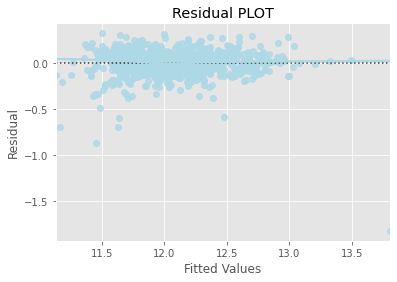

In [74]:
# Goldfeldquandt Test

#Linearity of variables
# Predicted values
fitted = model10.fittedvalues

# sns.set_style("whitegrid")
sns.residplot(x = fitted, y = residuals, color = "lightblue", lowess = True)

plt.xlabel("Fitted Values")

plt.ylabel("Residual")

plt.title("Residual PLOT")

plt.show()

**Observations:**

- We can see that there is no pattern in the residuals vs fitted values scatter plot now, i.e., the linearity assumption is satisfied.

<AxesSubplot:ylabel='Count'>

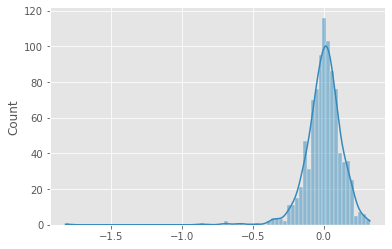

In [75]:
#Normality of error terms
# Plot histogram of residuals
sns.histplot(residuals, kde = True)

- We can see that the error terms are normally distributed. The assumption of normality is satisfied.

In [76]:
# Using the params method to get the coefficients of the model
coef = model10.params

coef

const                   11.255676
LotArea                  0.490713
OverallQual              0.601497
OverallCond              0.374386
GrLivArea                1.513656
KitchenAbvGr            -0.160315
GarageCars               0.270234
WoodDeckSF               0.096774
ScreenPorch              0.136077
Bldg-Age                -0.256120
LotConfig_CulDSac        0.045164
Neighborhood_Edwards    -0.096113
Neighborhood_OldTown    -0.092829
Condition1_Norm          0.059668
HouseStyle_1Story        0.056667
Exterior1st_BrkFace      0.079202
BsmtQual_Gd             -0.039509
BsmtQual_TA             -0.048419
BsmtExposure_Gd          0.044504
BsmtFinType1_GLQ         0.028072
BsmtFinType1_Unf        -0.059553
KitchenQual_Fa          -0.191699
KitchenQual_Gd          -0.079677
KitchenQual_TA          -0.123747
SaleType_New             0.040380
dtype: float64

In [77]:
# Let us write the equation of the fit
Equation = "House Price ="

print(Equation, end = '\t')

for i in range(len(coef)):
    
    print('(', coef[i], ') * ', coef.index[i], '+', end = ' ')

House Price =	( 11.255675907908138 ) *  const + ( 0.49071253552628313 ) *  LotArea + ( 0.6014968167384624 ) *  OverallQual + ( 0.37438646153537436 ) *  OverallCond + ( 1.5136555154855782 ) *  GrLivArea + ( -0.160315170252324 ) *  KitchenAbvGr + ( 0.2702341196760021 ) *  GarageCars + ( 0.09677425364768066 ) *  WoodDeckSF + ( 0.13607657735011147 ) *  ScreenPorch + ( -0.25612022789030164 ) *  Bldg-Age + ( 0.045163982139627024 ) *  LotConfig_CulDSac + ( -0.09611279012279006 ) *  Neighborhood_Edwards + ( -0.09282883370895456 ) *  Neighborhood_OldTown + ( 0.059668431372140895 ) *  Condition1_Norm + ( 0.05666734835799542 ) *  HouseStyle_1Story + ( 0.07920204013061027 ) *  Exterior1st_BrkFace + ( -0.0395086533483294 ) *  BsmtQual_Gd + ( -0.048419109606537725 ) *  BsmtQual_TA + ( 0.04450356529046942 ) *  BsmtExposure_Gd + ( 0.028072280565850594 ) *  BsmtFinType1_GLQ + ( -0.059553065146917716 ) *  BsmtFinType1_Unf + ( -0.1916987059856856 ) *  KitchenQual_Fa + ( -0.07967699434511366 ) *  KitchenQ

**Ridge Regression**

In [78]:
#Ridge Regression
rdg = Ridge()
rdg.fit(X_train_scaled8, y_train)

Ridge()

In [79]:
ridge_regression_perf = model_pref(rdg, X_train_scaled8, X_test_scaled8)

ridge_regression_perf_test = model_performance_regression(rdg, X_test_scaled8, y_test)

ridge_regression_perf

    Data      RMSE       MAE        r2
0  Train  0.138558  0.095461  0.838151
1   Test  0.175271  0.115944  0.826658


- **Ridge regression is producing similar results in comparison to Linear Regression model.**

**Lasso Regression**

In [80]:
#lasso Regression
lasso = Lasso()
lasso.fit(X_train_scaled8, y_train)

Lasso()

In [81]:
model_pref(lasso, X_train_scaled8, X_test_scaled8)

    Data      RMSE       MAE            r2
0  Train  0.378408  0.294015 -4.537952e+28
1   Test  0.372542  0.294051 -4.398349e+28


- **Lasso regression model has very poor performance and has no predictive power**

### **Non-Linear Regression Models**

**Decision Tree Regressor**

In [82]:
# Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state = 1)

# Fitting the model
dt_regressor.fit(X_train_scaled8, y_train)

model_pref(dt_regressor, X_train_scaled8, X_test_scaled8)

    Data      RMSE       MAE        r2
0  Train  0.001450  0.000090  0.999985
1   Test  0.325546  0.238736  0.621756


**Tuned Decisioned Tree Model**

In [83]:
#Tuning the Decision Tree Regressor
# Choose the type of regressor 
dtree_tuned = DecisionTreeRegressor(random_state = 1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 8), 
              
              'criterion': ['squared_error', 'friedman_mse'],
              
              'min_samples_leaf': [1, 3, 5, 7],
              
              'max_leaf_nodes': [2, 5, 7] + [None]
             }

# Type of scoring used to compare parameter combinations
scorer = make_scorer(r2_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train_scaled8, y_train)

# Set the dtree_tuned_regressor to the best combination of parameters
dtree_tuned_regressor = grid_obj.best_estimator_

dtree_tuned_regressor.fit(X_train_scaled8, y_train)

DecisionTreeRegressor(max_depth=7, min_samples_leaf=7, random_state=1)

In [84]:
dt_regressor_perf = model_pref(dtree_tuned_regressor, X_train_scaled8, X_test_scaled8)

dt_regressor_perf_test = model_performance_regression(dtree_tuned_regressor, X_test_scaled8, y_test)

dt_regressor_perf

    Data      RMSE       MAE        r2
0  Train  0.132320  0.097376  0.860694
1   Test  0.273972  0.199951  0.661990


**Observation:**

- The Decision Tree Regressor giving a poor performance as its overfitting and not generalizing well.

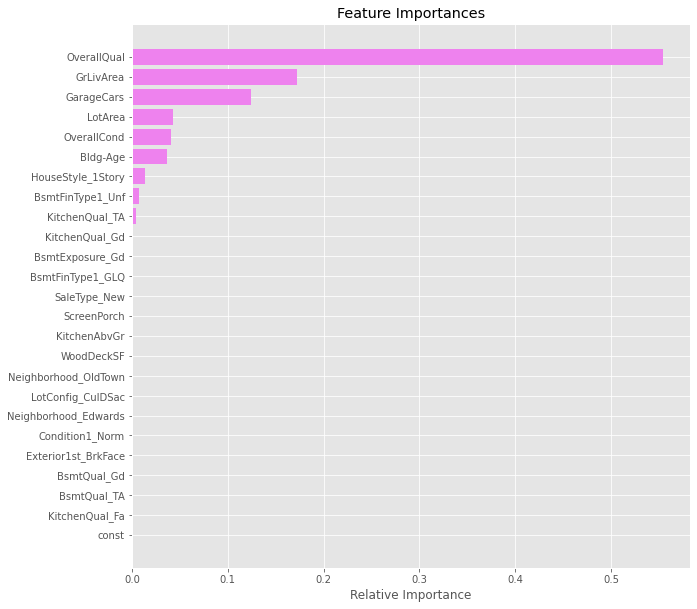

In [85]:
# Plotting the feature importance of Decision Tree Regressor

features = list(X_train_scaled8.columns)

importances = dtree_tuned_regressor.feature_importances_

indices = np.argsort(importances)

plt.figure(figsize = (10, 10))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [features[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

**Observation:**

- We can see the "OverallQual", "GrlivArea", "GarageCars" are the most important features, some features further down the list have no impact on the predictive power of the model

**Bagging Regressor**

In [86]:
# Bagging Regressor
bagging_estimator = BaggingRegressor(random_state = 1)

# Fitting the model
bagging_estimator.fit(X_train_scaled8, y_train)

model_pref(bagging_estimator, X_train_scaled8, X_test_scaled8)

    Data      RMSE       MAE        r2
0  Train  0.066157  0.043444  0.965572
1   Test  0.191979  0.142932  0.802384


In [87]:
#Tuned Bagging Regressor
# Choose the type of regressor
bagging_tuned = BaggingRegressor(random_state = 1)

# Grid of parameters to choose from
parameters = {"n_estimators": [10, 15, 20],
              
              "max_samples": [0.8, 1],
              
              "max_features": [0.8, 1]
             }

# Type of scoring used to compare parameter combinations
scorer = make_scorer(r2_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train_scaled8, y_train)

# Set the bagging_tuned_regressor to the best combination of parameters
bagging_tuned_regressor = grid_obj.best_estimator_

bagging_tuned_regressor.fit(X_train_scaled8, y_train)

BaggingRegressor(max_features=0.8, max_samples=0.8, n_estimators=20,
                 random_state=1)

In [88]:
bagging_estimator_perf = model_pref(bagging_tuned_regressor, X_train_scaled8, X_test_scaled8)

bagging_estimator_perf_test = model_performance_regression(bagging_tuned_regressor, X_test_scaled8, y_test)

bagging_estimator_perf

    Data      RMSE       MAE        r2
0  Train  0.071461  0.047150  0.958718
1   Test  0.177742  0.138532  0.818198


**Observation:**

- The Bagging Regressor giving a poor performance as its overfitting and not generalizing well.

**Random Forest Regressor**

In [89]:
# Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators = 100, random_state = 1)

# Fitting the model
rf_regressor.fit(X_train_scaled8, y_train)

model_pref(rf_regressor, X_train_scaled8, X_test_scaled8)

    Data      RMSE       MAE        r2
0  Train  0.053783  0.036693  0.977394
1   Test  0.188169  0.143465  0.809396


In [90]:
#Tuned Random Forest Regressor
rf_tuned = RandomForestRegressor(random_state = 1)

# Grid of parameters to choose from
parameters = {"n_estimators": [110, 120],
              
    "max_depth": [5, 7],
              
    "max_features": [0.8, 1]
             }

# Type of scoring used to compare parameter combinations
scorer = make_scorer(r2_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train_scaled8, y_train)

# Set the rf_tuned_regressor to the best combination of parameters
rf_tuned_regressor = grid_obj.best_estimator_

rf_tuned_regressor.fit(X_train_scaled8, y_train)

RandomForestRegressor(max_depth=7, max_features=0.8, n_estimators=120,
                      random_state=1)

In [91]:
regressor_perf = model_pref(rf_tuned_regressor, X_train_scaled8, X_test_scaled8)

regressor_perf_test = model_performance_regression(rf_tuned_regressor, X_test_scaled8, y_test)

regressor_perf

    Data      RMSE       MAE        r2
0  Train  0.092493  0.069521  0.927034
1   Test  0.167728  0.125915  0.828782


**Observation:**

- The Random Forest Regressor is overfitting and not generalizing well.

**Boosting Models**

**Adaboost Regressor**

In [92]:
# Adaboost Regressor
adaboost_model = AdaBoostRegressor(random_state = 1)

# Fitting the model
adaboost_model.fit(X_train_scaled8, y_train)

adaboost_perf = model_pref(adaboost_model, X_train_scaled8, X_test_scaled8)

adaboost_perf_test = model_performance_regression(adaboost_model, X_test_scaled8, y_test)

adaboost_perf

    Data      RMSE       MAE        r2
0  Train  0.160327  0.129815  0.803389
1   Test  0.230348  0.183515  0.722642


**Observation:**

- The Boosting Regressor model is overfitting and not generalizing well.
- We can use Hyperparameter Tuning to reduce the problem overfitting

**Gradient Boost Regressor**

In [93]:
# Gradient Boost Regressor
gbc = GradientBoostingRegressor(random_state = 1)

# Fitting the model
gbc.fit(X_train_scaled8, y_train)

gbc_perf = model_pref(gbc, X_train_scaled8, X_test_scaled8)

gbc_perf_test = model_performance_regression(gbc, X_test_scaled8, y_test)

gbc_perf

    Data      RMSE       MAE        r2
0  Train  0.085450  0.063654  0.944089
1   Test  0.158488  0.119941  0.836154


**XGBoost Regressor**

In [94]:
# XGBoost Regressor
xgb = XGBRegressor(random_state = 1, eval_metric = 'logloss')

# Fitting the model
xgb.fit(X_train_scaled8,y_train)

xgb_perf = model_pref(xgb, X_train_scaled8, X_test_scaled8)

xgb_perf_test = model_performance_regression(xgb, X_test_scaled8, y_test)

xgb_perf

    Data      RMSE       MAE        r2
0  Train  0.013816  0.009699  0.998653
1   Test  0.196075  0.144713  0.740725


**Observation:**

- The Boosting Regressor model is overfitting and not generalizing well.
- We can use Hyperparameter Tuning to reduce the problem overfitting

In [95]:
models_test_comp_df = pd.concat(
    [
        lin_reg_test.T,
        ridge_regression_perf_test.T,
        dt_regressor_perf_test.T,
        regressor_perf_test.T,
        bagging_estimator_perf_test.T,
        adaboost_perf_test.T,
        gbc_perf_test.T,
        xgb_perf_test.T
    ],
    axis = 1,
)

models_test_comp_df.columns = [
    "Linear Regression",
    "Ridge Regression",
    "Decision tree regressor",
    "Random Forest regressor",
    "Bagging regressor",
    "Adaboost regressor",
    "Gradientboost regressor",
    "XGBoost regressor"
]

print("Test performance comparison:")

models_test_comp_df

Test performance comparison:


,Linear Regression,Ridge Regression,Decision tree regressor,Random Forest regressor,Bagging regressor,Adaboost regressor,Gradientboost regressor,XGBoost regressor
RMSE,0.186636,0.175271,0.273972,0.167728,0.177742,0.230348,0.158488,0.196075
MAE,0.120498,0.115944,0.199951,0.125915,0.138532,0.183515,0.119941,0.144713
R-squared,0.747674,0.777468,0.456270,0.796209,0.771151,0.615638,0.818045,0.721507
Adj. R-squared,0.730897,0.762672,0.420118,0.782659,0.755935,0.590082,0.805947,0.702990
MAPE,0.999303,0.963617,1.670053,1.047353,1.155006,1.528421,0.998465,1.201171


**Observation:**
- From the table above, **"Random Forest regressor"**, followed by **"Linear Regression", "Ridge Regression", "Bagging regressor"** give the best performance judging by the values of R-squared.

## Conclusion and Recommendations

**Lastly below is our chosen model equation:**

    House Price =	( 11.255675907908138 ) *  const + ( 0.49071253552628313 ) *  LotArea + ( 0.6014968167384624 ) *  OverallQual + ( 0.37438646153537436 ) *  OverallCond + ( 1.5136555154855782 ) *  GrLivArea + ( -0.160315170252324 ) *  KitchenAbvGr + ( 0.2702341196760021 ) *  GarageCars + ( 0.09677425364768066 ) *  WoodDeckSF + ( 0.13607657735011147 ) *  ScreenPorch + ( -0.25612022789030164 ) *  Bldg-Age + ( 0.045163982139627024 ) *  LotConfig_CulDSac + ( -0.09611279012279006 ) *  Neighborhood_Edwards + ( -0.09282883370895456 ) *  Neighborhood_OldTown + ( 0.059668431372140895 ) *  Condition1_Norm + ( 0.05666734835799542 ) *  HouseStyle_1Story + ( 0.07920204013061027 ) *  Exterior1st_BrkFace + ( -0.0395086533483294 ) *  BsmtQual_Gd + ( -0.048419109606537725 ) *  BsmtQual_TA + ( 0.04450356529046942 ) *  BsmtExposure_Gd + ( 0.028072280565850594 ) *  BsmtFinType1_GLQ + ( -0.059553065146917716 ) *  BsmtFinType1_Unf + ( -0.1916987059856856 ) *  KitchenQual_Fa + ( -0.07967699434511366 ) *  KitchenQual_Gd + ( -0.12374688145124735 ) *  KitchenQual_TA + ( 0.04038031834156125 ) *  SaleType_New 

- From the above equation, we can interpret that, with one unit change in the variable **GrLivArea**, the outcome variable, i.e., log of **House Price** increases by 1.51 units and one unit change in variable **OverallQual** will cause the **HousePrice** to increase by 0.6. 
- So, if we want higher SalePrices , we may want to improve the 3 most significant variables from our equation, the **Overall_Quality** , **Lot_Area** and **Living_Room_Area**. 
